In [1]:
%load_ext autoreload
%autoreload 2

# Get parent directory and add to sys.path
import os
import sys

parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
# MPC import
from LinearMPC_4_1.MPCVelControl import MPCVelControl
from PIControl.PIControl import PIControl
import numpy as np
from src.rocket import Rocket
from src.vel_rocket_vis import RocketVis

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir, "rocket.yaml")

In [3]:
# Compare with Deliverable_5_1
Ts = 0.05
sim_time = 15
H = 7.0
x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])
x_target = np.zeros((12,))

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

rocket.mass = 1.5
rocket.fuel_rate = 0.0

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, x_target=x_target, method='nonlinear'
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, Ref=ref[:, :-1], T_ol=t_ol[..., :-1], X_ol=x_ol, U_ol=u_ol);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
Simulating time 0.40: 
Simulating time 0.45: 
Simulating time 0.50: 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
Simulating time 0.70: 
 State be

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=299, step=2), IntSlider(value=0…

[0.43897129]


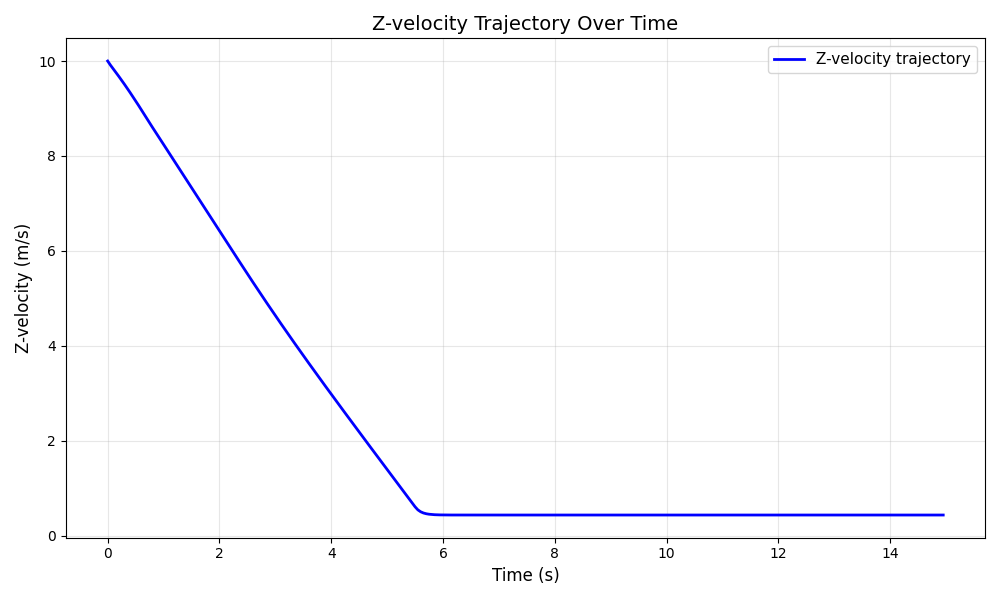

In [4]:
import matplotlib.pyplot as plt

# After the simulation, plot the z-velocity trajectory
# Create time array matching the trajectory length
# vel_z_traj is saved at each control step, so it has length N_cl (same as t_cl[:-1])
t_vel_z = t_cl[:-1]  # Time points for vel_z_traj (excludes the last time point)

# Convert trajectory list to numpy array for easier plotting
vel_z_array = np.array(mpc.vel_z_traj).flatten()  # Flatten in case it's 2D
print(mpc.vel_z_traj[-1])
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t_vel_z, vel_z_array, 'b-', linewidth=2, label='Z-velocity trajectory')
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Z-velocity (m/s)', fontsize=12)
plt.title('Z-velocity Trajectory Over Time', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

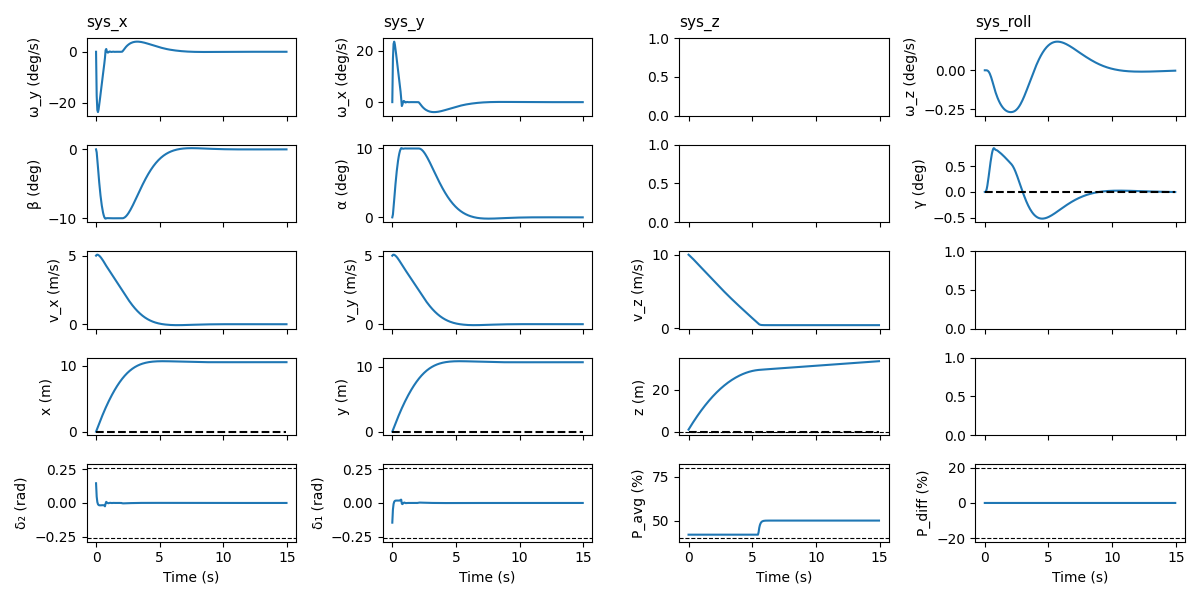

In [5]:
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, ref[:, :-1])

In [6]:
Ts = 0.05
sim_time = 30
H = 7.0
x0 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 100])  # initial state
# x0 = np.array([0, 0, 0, 0, 0, 0, 5, 5, 10, 0, 0, 1])
pos_target = np.array([0, 0, 10.0])

rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
pos_controller = PIControl(pos_target)
mpc = MPCVelControl().new_controller(rocket, Ts, H)

rocket.mass = 1.5
rocket.fuel_rate = 0.0

t_cl, x_cl, u_cl, t_ol, x_ol, u_ol, ref = rocket.simulate_control(
    mpc, sim_time, H, x0, pos_control=pos_controller, method="nonlinear"
)

vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1.0
vis.animate(
    t_cl[:-1],
    x_cl[:, :-1],
    u_cl,
    Ref=ref[:, :-1],
    T_ol=t_ol[..., :-1],
    X_ol=x_ol,
    U_ol=u_ol,
);

Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 31 iterations.
Maximum invariant set successfully computed after 1 iterations.
Maximum invariant set successfully computed after 44 iterations.
Simulating time 0.00: 
Simulating time 0.05: 
Simulating time 0.10: 
Simulating time 0.15: 
Simulating time 0.20: 
Simulating time 0.25: 
Simulating time 0.30: 
Simulating time 0.35: 
 State beta violation: -0.17 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.40: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.45: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.50: 
 State beta violation: -0.18 < -0.17, 
 State alpha violation: 0.18 > 0.17, 
Simulating time 0.55: 
Simulating time 0.60: 
Simulating time 0.65: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 0.70: 
 State beta violation: -0.18 < -0.17, 
 State alph

/opt/miniconda3/envs/mpc2025/lib/python3.12/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(



Simulating time 3.90: 
Simulating time 3.95: 
Simulating time 4.00: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 4.05: 
 State alpha violation: 0.17 > 0.17, 
Simulating time 4.10: 
Simulating time 4.15: 
Simulating time 4.20: 
Simulating time 4.25: 
Simulating time 4.30: 
Simulating time 4.35: 
Simulating time 4.40: 
Simulating time 4.45: 
Simulating time 4.50: 
Simulating time 4.55: 
Simulating time 4.60: 
Simulating time 4.65: 
Simulating time 4.70: 
Simulating time 4.75: 
Simulating time 4.80: 
Simulating time 4.85: 
Simulating time 4.90: 
Simulating time 4.95: 
Simulating time 5.00: 
Simulating time 5.05: 
Simulating time 5.10: 
Simulating time 5.15: 
Simulating time 5.20: 
Simulating time 5.25: 
Simulating time 5.30: 
Simulating time 5.35: 
Simulating time 5.40: 
Simulating time 5.45: 
Simulating time 5.50: 
Simulating time 5.55: 
Simulating time 5.60: 
Simulating time 5.65: 
Simulating time 5.70: 
Simulating time 5.75: 
Simulating time 5.80: 
Simulating time 5.85: 
Sim

AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=599, step=2), IntSlider(value=0…

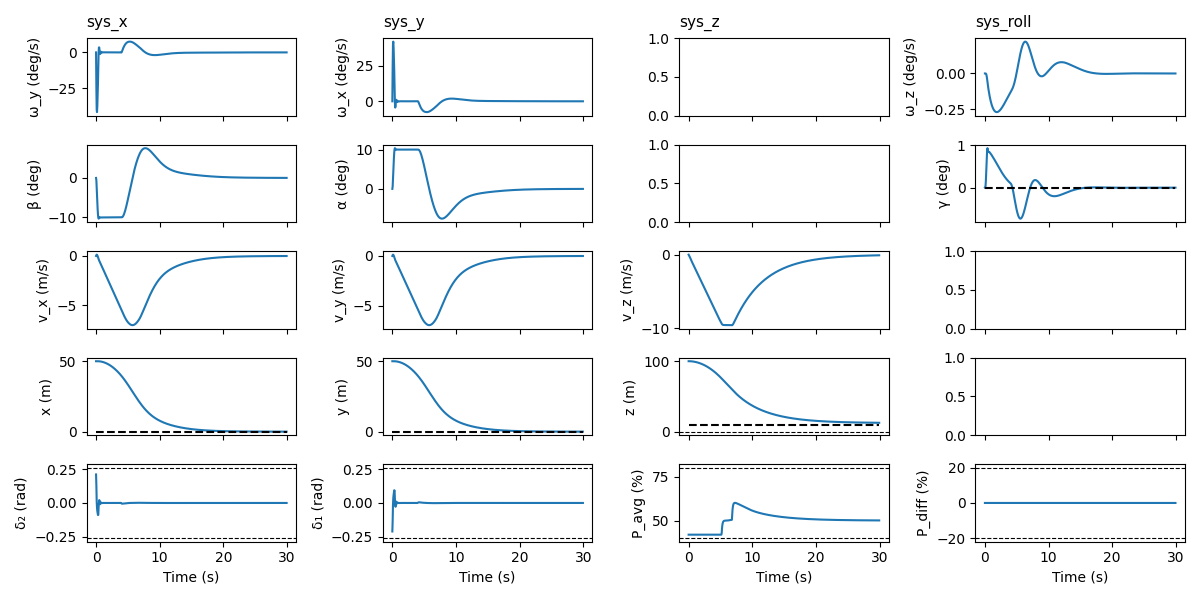

In [7]:
from src.vel_rocket_vis import RocketVis, plot_static_states_inputs
target = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10])
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, target)